In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds=pd.read_csv('loan_data.csv')
ds.head(5)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

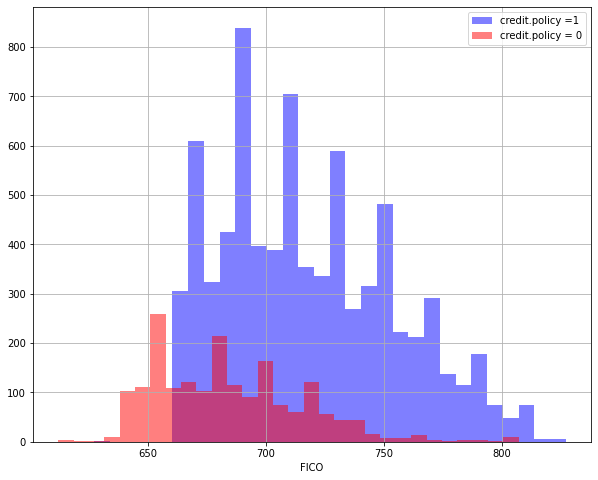

In [3]:
plt.figure(figsize=(10,8))
ds[ds['credit.policy'] == 1]['fico'].hist(alpha = 0.5,color = 'blue', bins = 30,label = 'credit.policy =1 ')
ds[ds['credit.policy'] == 0]['fico'].hist(alpha = 0.5,color = 'red', bins = 30,label = 'credit.policy = 0')
plt.legend()
plt.xlabel('FICO')


In [8]:
trnsfrm = ['purpose']
final_data = pd.get_dummies(ds,columns= trnsfrm,drop_first = 'True')
final_data.info()
print(final_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [10]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis = 1)
y = final_data['not.fully.paid']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state  = 101)
print(X_train)
print(y_train)

      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
4845              1    0.1426       548.90       10.714418  14.67   682   
6910              1    0.0774       312.19       10.819778   0.86   772   
8146              0    0.1520       208.59       10.491274  18.53   642   
7113              1    0.1385       511.56       10.950807  12.74   682   
195               1    0.1059       130.18       11.034890  17.81   682   
...             ...       ...          ...             ...    ...   ...   
599               1    0.1671       710.18       11.082143  20.09   662   
5695              1    0.1496       164.57       10.162770  22.36   662   
8006              0    0.1659       531.74       10.616437  20.53   652   
1361              1    0.0907       238.75       11.002100   4.86   752   
1547              1    0.0800       142.59       10.978490   5.58   757   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
4845        3959.958

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [7]:
y_pred = rfc.predict(X_test)


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[2423    8]
 [ 434    9]]
Accuracy score: 0.8462073764787752
Precision score: 0.5294117647058824
Recall score: 0.020316027088036117
